# ДЗ по "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"
##  Видеоурок 4. Визуализация данных в Matplotlib.
* Домашнее задание:  
[Практическое задание](https://gbcdn.mrgcdn.ru/uploads/asset/5788494/attachment/c94a5de584715fcc5ef99b652ec48639.pdf).

## Тема “Визуализация данных в Matplotlib”

In [2]:
# Устанавливаем пакеты есои они не установлены
# !pip install matplotlib

### Задание 1
- Загрузите модуль `pyplot` библиотеки `matplotlib` с псевдонимом `plt`, а также библиотеку `numpy` с псевдонимом `np`.
- Примените магическую функцию `%matplotlib inline` для отображения графиков в Jupyter Notebook и настройки конфигурации ноутбука со значением 'svg' для более четкого отображения графиков.
- Создайте список под названием `x` с числами 1, 2, 3, 4, 5, 6, 7 и список `y` с числами 3.5, 3.8, 4.2, 4.5, 5, 5.5, 7.
- С помощью функции `plot` постройте график, соединяющий линиями точки с горизонтальными координатами из списка `x` и вертикальными из списка `y`.
- Затем в следующей ячейке постройте диаграмму рассеяния (другие названия - диаграмма разброса, scatter plot).

In [3]:
# Загружаем необходимые библиотеки
from matplotlib import pyplot as plt
import numpy as np

# Следующая магическая команда Jupyter Notebook нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне
%matplotlib inline
# Настройка более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'

In [4]:
# Зададим точки x и y
x = [1, 2, 3, 4, 5, 6, 7]
y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7]

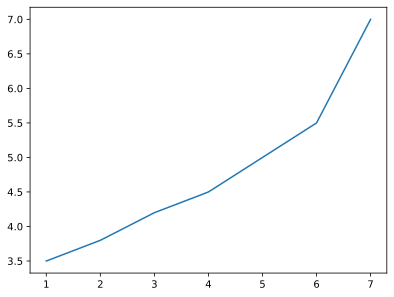

In [5]:
# Постром график
plt.plot(x, y)
plt.show()

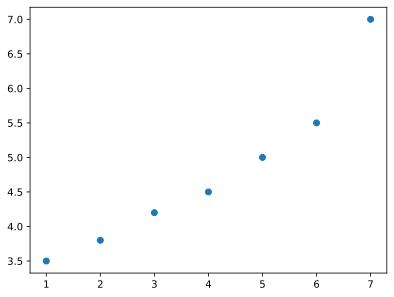

In [6]:
# Построим диаграмму рассеяния (расброса)
plt.scatter(x, y)
plt.show()

### Задание 2
- С помощью функции `linspace` из библиотеки `Numpy` создайте массив `t` из 51 числа от 0 до 10 включительно.
- Создайте массив `Numpy` под названием `f`, содержащий косинусы элементов массива `t`.
- Постройте линейную диаграмму, используя массив `t` для координат по горизонтали,а массив `f` - для координат по вертикали. Линия графика должна быть зеленого цвета.
- Выведите название диаграммы - 'График f(t)'. Также добавьте названия для горизонтальной оси - 'Значения t' и для вертикальной - 'Значения f'.
- Ограничьте график по оси `x` значениями 0.5 и 9.5, а по оси `y` - значениями -2.5 и 2.5.

In [7]:
# Создадим массив t
t = np.linspace(0, 10, 51)
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

In [8]:
# Создадим массив f
f = np.cos(t)
f

array([ 1.        ,  0.98006658,  0.92106099,  0.82533561,  0.69670671,
        0.54030231,  0.36235775,  0.16996714, -0.02919952, -0.22720209,
       -0.41614684, -0.58850112, -0.73739372, -0.85688875, -0.94222234,
       -0.9899925 , -0.99829478, -0.96679819, -0.89675842, -0.79096771,
       -0.65364362, -0.49026082, -0.30733287, -0.11215253,  0.08749898,
        0.28366219,  0.46851667,  0.63469288,  0.77556588,  0.88551952,
        0.96017029,  0.9965421 ,  0.99318492,  0.95023259,  0.86939749,
        0.75390225,  0.60835131,  0.43854733,  0.25125984,  0.05395542,
       -0.14550003, -0.33915486, -0.51928865, -0.67872005, -0.81109301,
       -0.91113026, -0.97484362, -0.99969304, -0.98468786, -0.93042627,
       -0.83907153])

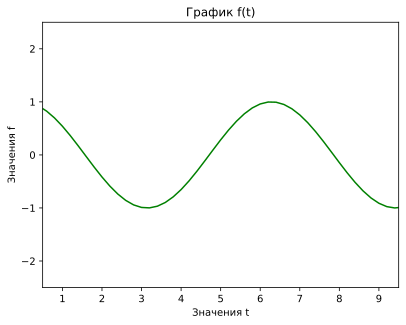

In [9]:
# Построим линейную диаграмму
plt.plot(t, f,  color="green")
# Подпишем график и оси
plt.title("График f(t)")
plt.xlabel("Значения t")
plt.ylabel("Значения f")
# Ограничим график 
plt.axis([0.5, 9.5, -2.5, 2.5])

plt.show()

### *Задание 3
- С помощью функции `linspace` библиотеки `Numpy` создайте массив x из 51 числа от -3 до 3 включительно.
- Создайте массивы `y1`, `y2`, `y3`, `y4` по следующим формулам:
  - y1 = x**2
  - y2 = 2 * x + 0.5
  - y3 = -3 * x - 1.5
  - y4 = sin(x)
- Используя функцию `subplots` модуля `matplotlib.pyplot`, создайте объект `matplotlib.figure.Figure` с названием `fig` и массив объектов `Axes` под названием `ax`,причем так, чтобы у вас было 4 отдельных графика в сетке, состоящей из двух строк и двух столбцов. В каждом графике массив x используется для координат по горизонтали.В левом верхнем графике для координат по вертикали используйте `y1`,в правом верхнем - `y2`, в левом нижнем - `y3`, в правом нижнем - `y4`.
- Дайте название графикам:
  - 'График y1', 
  - 'График y2' и т.д.
- Для графика в левом верхнем углу установите границы по оси `x` от -5 до 5. 
- Установите размеры фигуры 8 дюймов по горизонтали и 6 дюймов по вертикали.
- Вертикальные и горизонтальные зазоры между графиками должны составлять 0.3

In [10]:
# Создадим массив Х
x = np.linspace(-3, 3, 51)
x

array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
       -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
       -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
        0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
        1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
        2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  ])

In [11]:
# Создадим массивы y1, y2, y3, y4
y1 = x**2
y2 = 2 * x + 0.5
y3 = -3 * x - 1.5
y4 = np.sin(x)
print(y1)
print(y2)
print(y3)
print(y4)

[9.     8.2944 7.6176 6.9696 6.3504 5.76   5.1984 4.6656 4.1616 3.6864
 3.24   2.8224 2.4336 2.0736 1.7424 1.44   1.1664 0.9216 0.7056 0.5184
 0.36   0.2304 0.1296 0.0576 0.0144 0.     0.0144 0.0576 0.1296 0.2304
 0.36   0.5184 0.7056 0.9216 1.1664 1.44   1.7424 2.0736 2.4336 2.8224
 3.24   3.6864 4.1616 4.6656 5.1984 5.76   6.3504 6.9696 7.6176 8.2944
 9.    ]
[-5.5  -5.26 -5.02 -4.78 -4.54 -4.3  -4.06 -3.82 -3.58 -3.34 -3.1  -2.86
 -2.62 -2.38 -2.14 -1.9  -1.66 -1.42 -1.18 -0.94 -0.7  -0.46 -0.22  0.02
  0.26  0.5   0.74  0.98  1.22  1.46  1.7   1.94  2.18  2.42  2.66  2.9
  3.14  3.38  3.62  3.86  4.1   4.34  4.58  4.82  5.06  5.3   5.54  5.78
  6.02  6.26  6.5 ]
[  7.5    7.14   6.78   6.42   6.06   5.7    5.34   4.98   4.62   4.26
   3.9    3.54   3.18   2.82   2.46   2.1    1.74   1.38   1.02   0.66
   0.3   -0.06  -0.42  -0.78  -1.14  -1.5   -1.86  -2.22  -2.58  -2.94
  -3.3   -3.66  -4.02  -4.38  -4.74  -5.1   -5.46  -5.82  -6.18  -6.54
  -6.9   -7.26  -7.62  -7.98  -8.34  -8.7

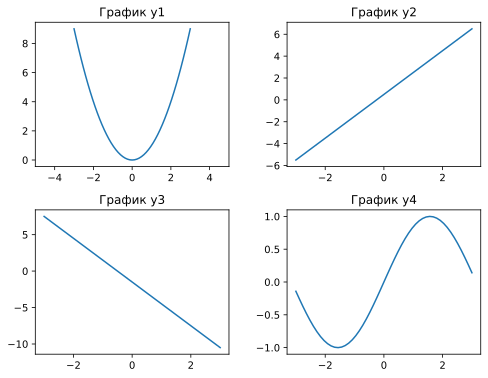

In [17]:
# Создаём массив 2х2 для графиков
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

# Задаём размеры фигуры 8х6 дюймов
fig.set_size_inches(8, 6)
# Зазоры между графиками по вертикали и горизонтали
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y1)
# Название графика
ax1.set_title("График y1")
# Задаём границы оси по Х
ax1.set_xlim([-5, 5])

ax2.plot(x, y2)
ax2.set_title("График y2")

ax3.plot(x, y3)
ax3.set_title("График y3")

ax4.plot(x, y4)
ax4.set_title("График y4")

plt.show()